In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
class Counter(dict):
    def __init__(self, c=None):
        if c is not None:
            for k, v in c.items():
                self.increment(k, v)

    def increment(self, k, v=1):
        o = self.get(k)
        if o == None:
            self[k] = v
        else:
            self[k] = o + v

    def get(self, k):
        r = super().get(k)
        # print(r)
        if r == None:
            r = 0
        return r

    def scale(self, c):
        for k, v in self.items():
            self[k] = v * c * 1.0
            
    def sum(self):
        r = 0
        for k, v in self.items():
            r += v
        return r
    
    def normalize(self):
        self.scale(1.0 / self.sum())

{2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1}


<BarContainer object of 11 artists>

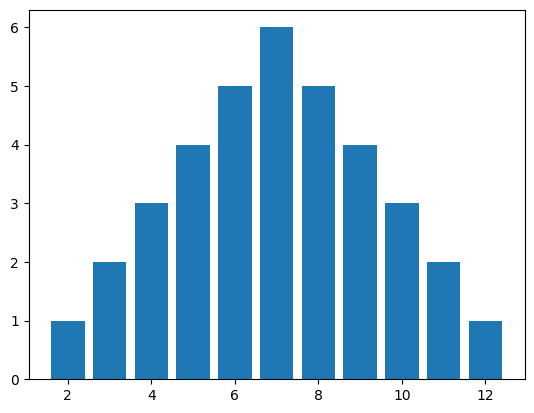

In [36]:
stones = ['Space', 'Reality', 'Mind', 'Time', 'Power', 'Soul']
stones_scores = dict(zip(stones, range(1, 7)))
aaaa = Counter()
for k, v in stones_scores.items():
    for k_, v_ in stones_scores.items():
        aaaa.increment(v+v_, 1)
print(aaaa)
plt.bar(aaaa.keys(), aaaa.values())

### 1번 문제: Probability Mass function(PMF)

{'SpaceSpace': 1, 'SpaceReality': 1, 'SpaceMind': 1, 'SpaceTime': 1, 'SpacePower': 1, 'SpaceSoul': 1, 'RealitySpace': 1, 'RealityReality': 1, 'RealityMind': 1, 'RealityTime': 1, 'RealityPower': 1, 'RealitySoul': 1, 'MindSpace': 1, 'MindReality': 1, 'MindMind': 1, 'MindTime': 1, 'MindPower': 1, 'MindSoul': 1, 'TimeSpace': 1, 'TimeReality': 1, 'TimeMind': 1, 'TimeTime': 1, 'TimePower': 1, 'TimeSoul': 1, 'PowerSpace': 1, 'PowerReality': 1, 'PowerMind': 1, 'PowerTime': 1, 'PowerPower': 1, 'PowerSoul': 1, 'SoulSpace': 1, 'SoulReality': 1, 'SoulMind': 1, 'SoulTime': 1, 'SoulPower': 1, 'SoulSoul': 1}


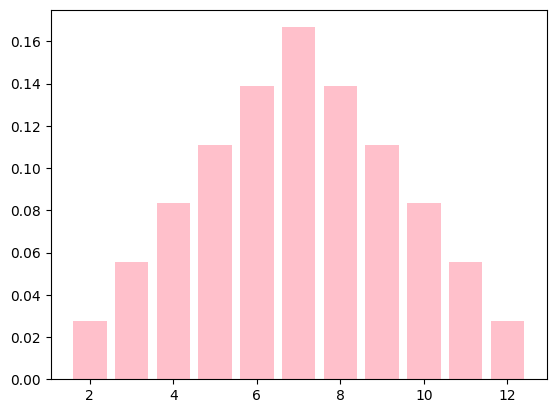

In [29]:
stones = ['Space', 'Reality', 'Mind', 'Time', 'Power', 'Soul']
stones_scores = dict(zip(stones, range(1, 7))) # {'Space': 1, 'Reality': 2, 'Mind': 3, 'Time': 4, 'Power': 5, 'Soul': 6}
# print(stones_scores)
# print(stones_scores[])

### start ###
score = [ 0 for _ in  range(13) ]
# print(score)

r = Counter()

for i in stones:
    for j in stones:
        r.increment(i+j, 1)
        score[stones_scores[i]+stones_scores[j]] += 1

sum = 0
x = []
y = []
for i in range(len(score)):
    sum += score[i]
    if score[i] != 0:
        x.append(i)

for i in x:
    y.append(score[i]/sum)

print(r)

plt.bar(x,y, color = 'pink')
plt.show()


### 2번 문제: PMF estimation

In [3]:
def gen_data(func): # 입력된 PMF를 기반으로 data를 생성하는 함수
    num_data=10000
    x= np.linspace(0,99,100)

    # func의 argument는 수정 가능
    p = func(x)

    error= 1-np.sum(p)
    if error<0.1 and error >= 0:
        p+=error/len(p)
    else:
        print("error:",error," p의 총합이 1이 안됩니다.")
        return -100

    g_data = np.random.choice(x,num_data,p=p,replace=True)
    # print(g_data)
    return g_data

def test(data, func):
    error=0
    test_num = 1000
    for i in range(test_num):
        error += np.mean(np.abs(np.sort(data)-np.sort(gen_data(func))))

    print("error:",error/test_num)
    return

[52. 57. 36. ... 40. 61. 40.]


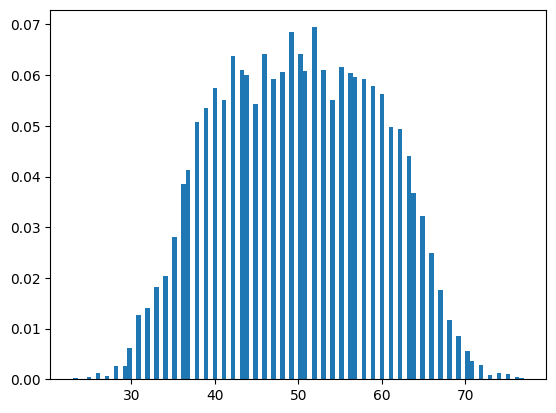

In [4]:
data = np.load("data.npy")
print(data)
_ = plt.hist(data, 100, density=True)


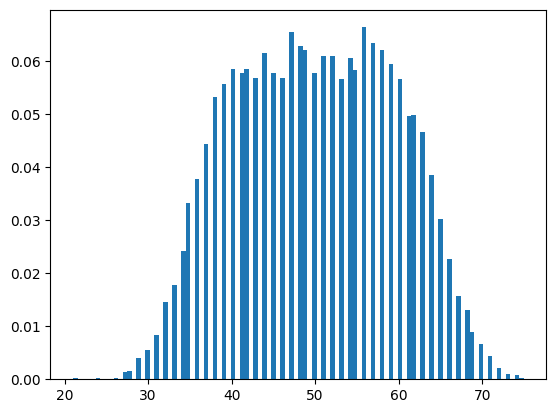

In [7]:
# 이산 랜덤 확률을 구하기 위해 사용한 code
# 이항 분포를 사용해서 test해본 code. error 값 0.13 도달

import math
fac = math.factorial

def com(a, b):
    return fac(a)/(fac(b) * fac(a-b))

def func(x):
    a = [0] * 100
    for i in range(100):
        a[i] += com(100, i) * ( 0.4 ** i ) * 0.6 ** ( 100 - i )
        a[i] += com(100, i) * ( 0.5 ** i ) * 0.5 ** ( 100 - i )    
        a[i] += com(100, i) * ( 0.6 ** i ) * 0.4 ** ( 100 - i ) 

    for i in range(100):
        a[i] /= 3
    return a


my_data = gen_data(func)
_ = plt.hist(my_data, 100, density=True)

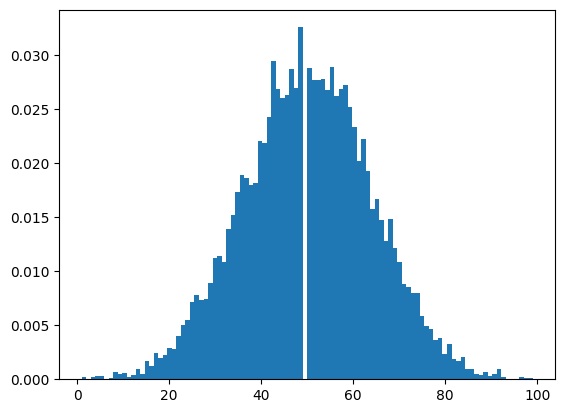

In [9]:
# 이산 랜덤 확률을 구하기 위해 사용한 code
# 이항 분포를 사용해서 test해본 code. but error값을 줄이지 못함.
import math
def com(a, b):
    top = a
    bottom = b
    if b == 0:
        return 1
    elif b == 1:
        return a
    while(b > 1):
        top = top * (a - 1)
        bottom = bottom * (b - 1)
        b -= 1
        a -= 1
    return top / bottom
        # print("top = ", top)
    # print("bottom = ", bottom)



def func(x):
    a = [0] * 100
    for i in range(350, 450):
        a[i - 350] = com(800, i) * ( (1 / 2) ** i ) * ( 1 / 2) ** ( 800 - i )
    return a

my_data = gen_data(func)
_ = plt.hist(my_data, 100, density=True)

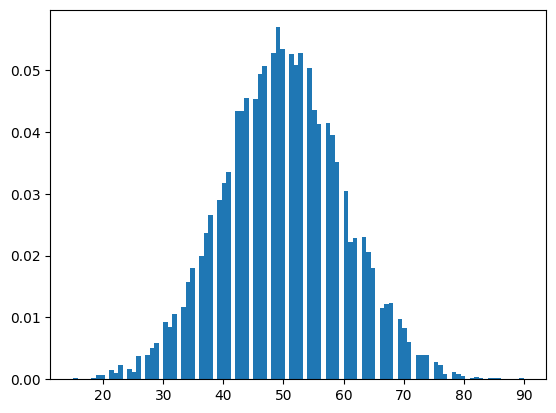

In [14]:
# 이산 랜덤 확률을 구하기 위해 사용한 code
# 포화송 분포를 이용해 구현해본 code. but error값이 0.7이하로는 줄어들지 않는다.

import math
# def com(a, b):
#     top = a
#     bottom = b
#     if b == 0:
#         return 1
#     elif b == 1:
#         return a
#     while(b > 1):
#         top = top * (a - 1)
#         bottom = bottom * (b - 1)
#         b -= 1
#         a -= 1
#     return top / bottom
        # print("top = ", top)
    # print("bottom = ", bottom)

# def com(a,b):
#     return math.factorial(a) /(math.factorial(b) * math.factorial(a - b))


# def func(x):
#     a = [0] * 100
#     for i in range(50, 150):
#         # k = int((i) /4)
#         a[i - 50] = com(200, i) * ( (1 / 8) ** i ) * ( 7 / 8) ** ( 200 - i )
    
#     return a

def func(x):
    a = [0] * 100
    for i in range(53, 153):
        # k = int(i / 2)
        # print(i)
        a[i- 53] = math.exp(-103) * (103 ** (i)) / math.factorial(i)
    # print(a)
    return a

my_data = gen_data(func)
_ = plt.hist(my_data, 100, density=True)

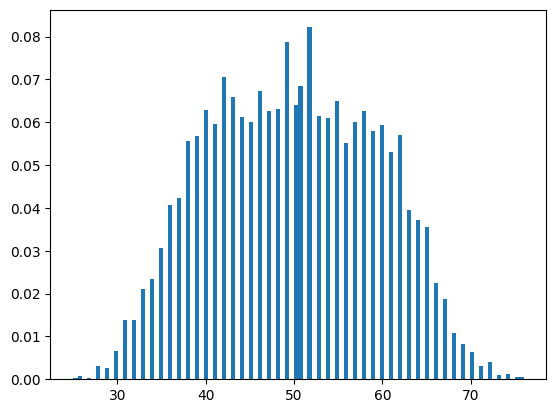

In [12]:
# count 기반으로 성공한 사례
def func(x):
    a = np.array([0] * 100)
    for i in data:
        a[int(i)] += 1
    a = a / len(data)
    return a

my_data = gen_data(func)
_ = plt.hist(my_data, 100, density=True)

In [13]:
test(data, func) # uniform

error: 0.11249870000000005


# 고찰
여러가지 random variable distribution에 대해서 공부할 수 있었습니다. 
기존 데이터에 적합한 식을 찾기위해 여러가지 시도를 했지만 결국에 error값이 0.7이하로 줄이지 못했습니다.
문제를 풀면서 해당 식을 만족하기 위해서는 확룰의 그래프 모양이 고르지 않은 모양이어야 했고, 가능한 분산값을 키우는 것을 목표로 했습니다.
이항분포의 경우 np(1-p)의 경우 p의 값이 1/2일 때, 최대 값을 갖고, n을 키워가면서 해봤지만 error값이 3까지 밖에 줄이지 못했습니다.
포화송분포의 경우 람다값을 키울때마다 error값이 줄었고, 연산의 최대치까지 해봤지만 error값이 0.7까지 밖에 줄이지 못했습니다.
여러개의 이항분포를 더하면서 해당 그래프와 비슷하게 접근하려고 노력했고, 결국에는 줄일 수 있었습니다.